In [25]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from urllib.request import urlopen
import certifi
import json

from src.plot_func import plot_cashflow

# Get data

### FMP

In [ ]:
def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    data_json = json.loads(data)
    return pd.DataFrame(data_json)

stock = "AAPL"
fmpkey = ""
url_base = f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?limit=10&apikey={fmpkey}'

def get_statement(stock, apikey):

    
    return

df = get_jsonparsed_data(url)

### yfinance

In [2]:
def get_ticker(ticker):
    ticker = yf.Ticker(ticker)

    return ticker


ticker = get_ticker('AAPL')

In [7]:
def obtain_cashflow(ticker):

    cashflow = ticker.cashflow

    return cashflow


data = obtain_cashflow(ticker).iloc[:, :4]
data_T = data.T.reset_index(names='date')

In [14]:
ticker.quarterly_cashflow

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,26707000000.0,20694000000.0,37503000000.0,19435000000.0,24287000000.0,NaN,NaN
Repurchase Of Capital Stock,-26522000000.0,-23205000000.0,-20139000000.0,-21003000000.0,-17478000000.0,NaN,NaN
Repayment Of Debt,-3253000000.0,-3148000000.0,-3984000000.0,0.0,-5511000000.0,NaN,NaN
Issuance Of Debt,NaN,NaN,NaN,0.0,NaN,NaN,NaN
Capital Expenditure,-2151000000.0,-1996000000.0,-2392000000.0,-2163000000.0,-2093000000.0,NaN,NaN
Interest Paid Supplemental Data,NaN,NaN,NaN,1213000000.0,717000000.0,1170000000.0,703000000.0
Income Tax Paid Supplemental Data,4699000000.0,7276000000.0,7255000000.0,11659000000.0,2126000000.0,NaN,NaN
End Cash Position,26635000000.0,33921000000.0,41974000000.0,30737000000.0,29898000000.0,NaN,NaN
Beginning Cash Position,33921000000.0,41974000000.0,30737000000.0,29898000000.0,27129000000.0,NaN,NaN
Changes In Cash,-7286000000.0,-8053000000.0,11237000000.0,839000000.0,2769000000.0,NaN,NaN


In [8]:
data_T

,date,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2023-09-30,99584000000.0,-77550000000.0,-11151000000.0,5228000000.0,NaN,-10959000000.0,3803000000.0,18679000000.0,30737000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
1,2022-09-30,111443000000.0,-89402000000.0,-9543000000.0,5465000000.0,NaN,-10708000000.0,2865000000.0,19573000000.0,24977000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2,2021-09-30,92953000000.0,-85971000000.0,-8750000000.0,20393000000.0,1105000000.0,-11085000000.0,2687000000.0,25385000000.0,35929000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
3,2020-09-30,73365000000.0,-72358000000.0,-12629000000.0,16091000000.0,880000000.0,-7309000000.0,3002000000.0,9501000000.0,39789000000.0,...,-127000000.0,8470000000.0,6917000000.0,-97000000.0,6829000000.0,-215000000.0,-215000000.0,11056000000.0,11056000000.0,57411000000.0


In [9]:
data.loc[['Operating Cash Flow', 'Change In Working Capital', 'Capital Expenditure',
                               'Depreciation And Amortization', 'Stock Based Compensation',
                               'Deferred Tax', 'Net Income From Continuing Operations']]

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Operating Cash Flow,110543000000.0,122151000000.0,104038000000.0,80674000000.0
Change In Working Capital,-6577000000.0,1200000000.0,-4911000000.0,5690000000.0
Capital Expenditure,-10959000000.0,-10708000000.0,-11085000000.0,-7309000000.0
Depreciation And Amortization,11519000000.0,11104000000.0,11284000000.0,11056000000.0
Stock Based Compensation,10833000000.0,9038000000.0,7906000000.0,6829000000.0
Deferred Tax,NaN,895000000.0,-4774000000.0,-215000000.0
Net Income From Continuing Operations,96995000000.0,99803000000.0,94680000000.0,57411000000.0


### Help functions

In [46]:

def plot_cashflow(data, x_col, y_cols, title, xlabel='Date', ylabel='Amount (in millions)', figsize=(10, 6)):
    """
    A helper function to plot cashflow data.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis (usually Date).
    y_cols (list of str): List of column names to plot on the y-axis.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis (default is 'Date').
    ylabel (str): Label for the y-axis (default is 'Amount (in millions)').
    figsize (tuple): Size of the plot (default is (10, 6)).
    """
    plt.figure(figsize=figsize)
    
    # Plot each column in y_cols
    for y_col in y_cols:
        plt.plot(data[x_col], data[y_col], label=y_col)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

# Break Down the Cash Flow Sections

a. Operating Activities
This section tells you how much cash the company generates from its core operations. Look at:

- Net Income: This gives you a baseline of the profitability.
- Depreciation & Amortization: Non-cash expenses that reduce net income but do not affect cash flow.
- Changes in Working Capital: Variations in accounts receivable, inventory, and payable

In [10]:
operating_activities = data_T[['date','Operating Cash Flow', 'Change In Working Capital', 'Capital Expenditure',
                               'Depreciation And Amortization', 'Stock Based Compensation',
                               'Deferred Tax', 'Net Income From Continuing Operations']].copy()

operating_activities

,date,Operating Cash Flow,Change In Working Capital,Capital Expenditure,Depreciation And Amortization,Stock Based Compensation,Deferred Tax,Net Income From Continuing Operations
0,2023-09-30,110543000000.0,-6577000000.0,-10959000000.0,11519000000.0,10833000000.0,NaN,96995000000.0
1,2022-09-30,122151000000.0,1200000000.0,-10708000000.0,11104000000.0,9038000000.0,895000000.0,99803000000.0
2,2021-09-30,104038000000.0,-4911000000.0,-11085000000.0,11284000000.0,7906000000.0,-4774000000.0,94680000000.0
3,2020-09-30,80674000000.0,5690000000.0,-7309000000.0,11056000000.0,6829000000.0,-215000000.0,57411000000.0


In [13]:
operating_activities['Free Cash Flow'] = operating_activities['Operating Cash Flow'] - abs(operating_activities['Capital Expenditure'])
operating_activities['YoY Operating Cash Flow Change'] = operating_activities['Operating Cash Flow'].sort_values('date',     ascending=True).pct_change() * 100

operating_activities

TypeError: Series.sort_values() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

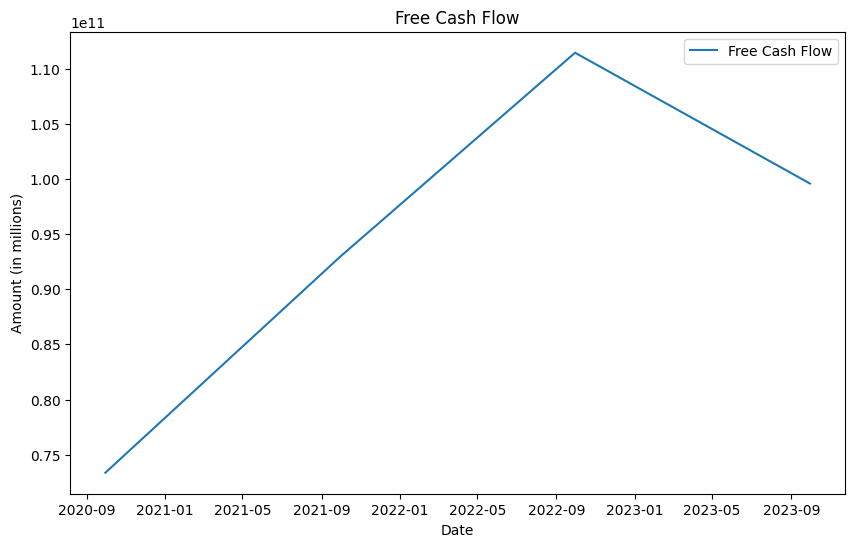

In [49]:
operating_activities = operating_activities.reset_index() 

plot_cashflow(data=operating_activities, 
              x_col='index', 
              y_cols=['Free Cash Flow'], 
              title='Free Cash Flow')

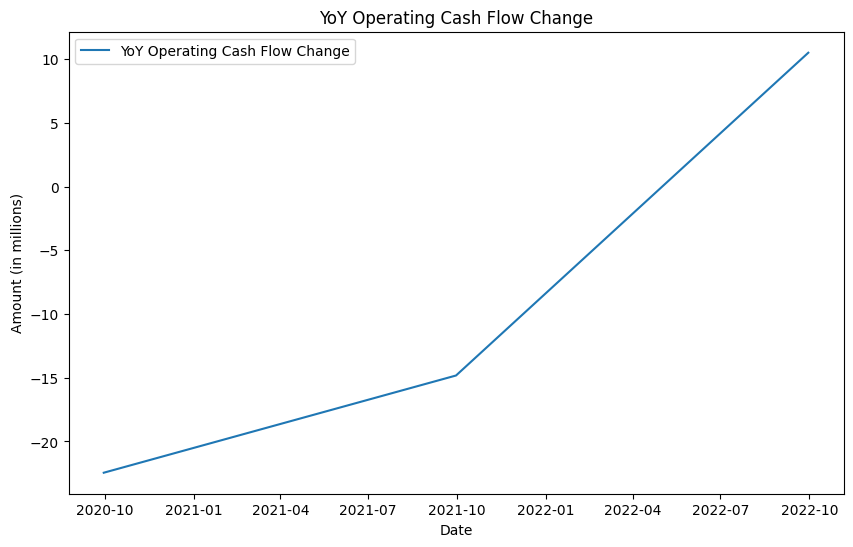

In [50]:
plot_cashflow(data=operating_activities, 
              x_col='index', 
              y_cols=['YoY Operating Cash Flow Change'], 
              title='YoY Operating Cash Flow Change')

b. Investing Activities
This section reflects where Apple is investing its capital, often in:

- Capital Expenditures (CapEx): Investments in physical assets like factories, stores, or equipment. A rising CapEx might indicate expansion.
- Purchases/Sales of Investments: Apple holds a large portfolio of marketable securities. Analyze how much of their cash flow is tied up in investments versus being deployed in business operations.

c. Financing Activities
This shows how Apple finances its operations and returns cash to shareholders:

- Share Buybacks: Apple has been repurchasing a large number of shares.
- Dividend Payments: Regular cash outflow to shareholders.
- Debt Issuance/Repayment: Analyze whether Apple is issuing debt or repaying it. Despite large cash reserves, Apple has issued debt due to historically low-interest rates.

# Key Ratios and Metrics

- Free Cash Flow (FCF):  
FCF = Operating Cash Flow - Capital Expenditures  
This is a key metric to see how much cash is available after Apple covers its basic operational expenses.
- Cash Conversion Ratio (CCR):  
CCR = Operating Cash Flow / Net Income  
This ratio shows how well Apple converts its net income into cash.

In [24]:
def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    data_json = json.loads(data)
    return pd.DataFrame(data_json)

url = 'https://financialmodelingprep.com/api/v3/income-statement/AAPL?limit=10&apikey=5ac80141f5198c04645adbd90ba2aef1'
df = get_jsonparsed_data(url)

C:\Users\sean.chang\AppData\Local\Temp\ipykernel_29240\1720647601.py:13: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())
